In [22]:
import pandas as pd
import datetime as dt
import seaborn as sns
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

In [23]:
def make_data():
    df = pd.read_csv("MORTGAGE30US.csv")
    df['DATE'] = pd.to_datetime(df['DATE'])
    df = df.rename(columns={"MORTGAGE30US":"30_Year_Rate"})
    
    #df["30_Year_Rate"]
    df_by_month = df.groupby(pd.Grouper(key='DATE', freq='M'))['30_Year_Rate'].mean()
    new_df = df_by_month.reset_index()
    new_df = new_df[584:620]
    #new_df["index ="] = 
    new_df['Numbers'] = range(0,36)

    den = pd.read_csv("DenverPricingTrends.csv")
    new_den = den.iloc[1:37]
    new_den
    new_den['Numbers'] = range(0,36)
    new_den

    merged_df = pd.merge(new_df, new_den, on='Numbers', how='inner')

   
    merged_df['price_pct_change'] = merged_df['MedianValueDenver'].pct_change()
    merged_df['sales_pct_change'] = merged_df['30_Year_Rate'].pct_change()

    #merged_df['rate_change'] = merged_df.groupby('DATE')['30_Year_Rate'].pct_change()
    #merged_df.pct_change(axis=["30_Year_Rate"], periods = 1)

    return merged_df

make_data()
    


<ipython-input-23-4c23c281f770>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_den['Numbers'] = range(0,36)


,DATE,30_Year_Rate,Numbers,month,year,MedianValueDenver,price_pct_change,sales_pct_change
0,2019-12-31,3.7200,0,December,2019,450000.0,NaN,NaN
1,2020-01-31,3.6240,1,January,2020,446000.0,-0.008889,-0.025806
2,2020-02-29,3.4650,2,February,2020,475000.0,0.065022,-0.043874
3,2020-03-31,3.4500,3,March,2020,509000.0,0.071579,-0.004329
4,2020-04-30,3.3060,4,April,2020,500000.0,-0.017682,-0.041739
5,2020-05-31,3.2325,5,May,2020,500000.0,0.000000,-0.022232
6,2020-06-30,3.1625,6,June,2020,505000.0,0.010000,-0.021655
7,2020-07-31,3.0160,7,July,2020,525000.0,0.039604,-0.046324
8,2020-08-31,2.9350,8,August,2020,525000.0,0.000000,-0.026857
9,2020-09-30,2.8900,9,September,2020,531000.0,0.011429,-0.015332


In [26]:
test_df = make_data()
reduced_df = test_df[["price_pct_change","sales_pct_change"]]
reduced_df = reduced_df[1:]



<ipython-input-23-4c23c281f770>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_den['Numbers'] = range(0,36)


In [27]:
X = reduced_df.iloc[:, 1].values.reshape(-1, 1)  # values converts it into a numpy array
Y = reduced_df.iloc[:, 0].values.reshape(-1, 1)  # -1 means that calculate the dimension of rows, but have 1 column
linear_regressor = LinearRegression()  # create object for the class
linear_regressor.fit(X, Y)  # perform linear regression
Y_pred = linear_regressor.predict(X)  # make predictions
Y_pred

array([[0.00686762],
       [0.00479714],
       [0.00932884],
       [0.0050418 ],
       [0.0072772 ],
       [0.00734335],
       [0.00451638],
       [0.00674726],
       [0.00806793],
       [0.00760439],
       [0.00703484],
       [0.00646788],
       [0.01200242],
       [0.01296741],
       [0.02093786],
       [0.00898846],
       [0.0061736 ],
       [0.01030846],
       [0.00570334],
       [0.00880603],
       [0.01214305],
       [0.01644382],
       [0.00982493],
       [0.01096435],
       [0.02266054],
       [0.02038637],
       [0.02229721],
       [0.0320876 ],
       [0.01551734],
       [0.01622301],
       [0.00755252],
       [0.00580217],
       [0.02934296],
       [0.02459938],
       [0.00824716]])

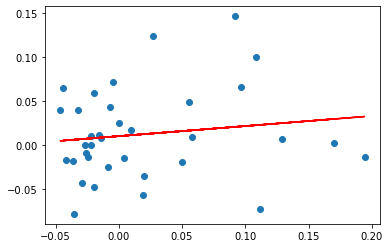

In [30]:
import matplotlib.pyplot as plt
plt.scatter(X, Y)
plt.plot(X, Y_pred, color='red')
plt.show()

In [44]:
den = pd.read_csv("DenverPricingTrends.csv")
new_den = den.iloc[1:37]
new_den
new_den['Numbers'] = range(0,36)
new_den

<ipython-input-44-4a1e6e2bb06e>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_den['Numbers'] = range(0,36)


,month,year,MedianValueDenver,Numbers
1,December,2019,450000.0,0
2,January,2020,446000.0,1
3,February,2020,475000.0,2
4,March,2020,509000.0,3
5,April,2020,500000.0,4
6,May,2020,500000.0,5
7,June,2020,505000.0,6
8,July,2020,525000.0,7
9,August,2020,525000.0,8
10,September,2020,531000.0,9


In [ ]:
#load data
df = pd.read_csv("MORTGAGE30US.csv")
df
#df.MORTGAGE30US.plot.line()
df.dtypes
import pandas as pd

df.dtypes
##df.MORTGAGE30US.plot.line()
import matplotlib.pyplot as plt
# Plot the 'X' and 'Y' columns
df.plot(x='DATE', y='MORTGAGE30US', kind='line')
plt.show()

df




In [ ]:
df
df['DATE'] = pd.to_datetime(df['DATE'])

In [ ]:
df_by_month = df.groupby(pd.Grouper(key='DATE', freq='M'))['MORTGAGE30US'].mean()

In [ ]:
new_df = df_by_month.reset_index()
new_df[584:]

new_df['month'] = new_df['DATE'].dt.month
new_df['year'] = new_df['DATE'].dt.year

In [ ]:
 new_df = new_df[584:]
 new_df.head()

In [ ]:
# denver pricing data
den = pd.read_csv("DenverPricingTrends.csv")
new_den = den.iloc[1:37]

new_den.head()

In [ ]:
df_concat = pd.concat([new_df, new_den], axis=0)
df_concat.tail(20)

#new_df

In [ ]:
#df.groupby('MORTGAGE30US').mean()

df.dtypes()

In [ ]:
# denver pricing data
den = pd.read_csv("DenverPricingTrends.csv")
new_den = den.iloc[1:37]

new_den

In [ ]:
df.iloc[2675:]